In [816]:
import pandas as pd
import numpy as np

### Loading the feature functions from CSV and trimming

In [817]:
df = pd.read_csv("features/ff_vdw_all.csv")

# Save to a CSV file
molecules = df['Mol'].values


molecules = molecules
molecules

array(['LiH', 'NaH', 'KH', 'RbH', 'CsH', 'CsCl', 'LiCl', 'CuI', 'LiF',
       'ZnS', 'CoO2', 'LiCoO2', 'Mg', 'Na', 'Ca', 'Li', 'Ni', 'Mn',
       'SnS2', 'LiSnS2'], dtype=object)

### Size Modification and adding parameters to Data Frame

In [818]:
df

,Mol,Pol_C,Pol_A,RadV_C,RadV_A,CN_C,CN_A,Ion_C,Ion_A,EA_C
0,LiH,164.10,4.51,1.7478,1.0912,6,6,5.3920,13.590,0.7540
1,NaH,162.70,4.51,1.8541,1.0912,6,6,5.1390,13.590,0.7540
2,KH,289.70,4.51,2.1206,1.0912,6,6,4.3410,13.590,0.7540
3,RbH,319.80,4.51,2.3088,1.0912,6,6,4.1770,13.590,0.7540
4,CsH,400.60,4.51,2.5283,1.0912,6,6,3.8490,13.590,0.7540
5,CsCl,400.60,14.60,2.5283,1.5523,8,8,3.8490,12.960,3.6170
6,LiCl,164.10,14.60,1.7478,1.5523,6,6,5.3920,12.960,3.6170
7,CuI,46.50,32.90,1.6504,1.8690,4,4,7.7260,10.451,3.0590
8,LiF,164.10,3.74,1.7478,1.1498,6,6,5.3920,17.423,3.3390
9,ZnS,38.67,19.40,1.6155,1.6554,4,4,9.3940,10.360,0.0000


In [819]:

%store -r res
res

[14.13330815446956,
 14.081369567351956,
 14.034265054162475,
 12.926169405830962,
 12.27212198878638,
 3.230739472566894,
 5.121300394981286,
 3.5739198265668453,
 4.715887333726234,
 2.499975609761724,
 1.8052940594169544,
 5.560246204451975,
 17.144355598718082,
 25.027177715806825,
 22.814559268959076,
 25.719392847659723,
 10.553895436793855,
 15.857470042410599,
 1.096295429346349,
 3.966428089692199]

In [820]:
# df = df.iloc[:10,0:]


## always inverse of EN_A

# df['Sum_EN'] = df['EN_C'] + df['EN_A']
# df['Diff_EN'] = abs(df['EN_A'] - df['EN_C'])
# # df['Diff_rad'] = df['RadV_A'] - df['RadV_C']


df['Sum_ion'] = df['Ion_C'] + df['Ion_A']
df['Sum_ion_cubed'] = df['Sum_ion']*df['Sum_ion']*df['Sum_ion']

df['Abs_diff_ion'] = abs(df['Ion_C'] - df['Ion_A'])
df['Abs_diff_ion_cubed'] = df['Abs_diff_ion']*df['Abs_diff_ion']*df['Abs_diff_ion']

# df.drop(columns=['Abs_diff_ion','Sum_ion'])

# df['Sum_EN'] = df['EN_A'] + df['EN_C']
# df['Sum_EN_cubed'] = df['Sum_EN']*df['Sum_EN']*df['Sum_EN']

# df['Abs_diff_EN'] = abs(df['EN_A'] - df['EN_C'])
# df['Abs_diff_EN_cubed'] = df['Abs_diff_EN']*df['Abs_diff_EN']*df['Abs_diff_EN']

# df.drop(columns=['Sum_EN','Abs_diff_EN'])

# df['Sum_pol'] = df['Pol_C'] + df['Pol_A']
# df['Sum_pol_cubed'] = df['Sum_pol']*df['Sum_pol']*df['Sum_pol']

# df['Abs_diff_pol'] = abs(df['Pol_C'] - df['Pol_A'])
# df['Abs_diff_pol_cubed'] = df['Abs_diff_pol']*df['Abs_diff_pol']*df['Abs_diff_pol']


# Adding sqrt values for each column
# for col in df.columns:
#     # Make sure the column is numeric before applying sqrt
#     if pd.api.types.is_numeric_dtype(df[col]):
#         # df[f'{col}_sqrt'] = np.sqrt(abs(df[col]))
#         # df[f'{col}_squared'] = np.square(df[col])
#         df.drop(columns=[col], inplace=True)

# df = df.drop(columns=['EN_C'])

# df['sum_ion'] = df['Ion_C'] + df['Ion_A']
# # df['diff_ion'] = df['Ion_C'] - df['Ion_A']
# df['diff_pol'] = abs(df['Pol_C'] - df['Pol_A'])

# df = df[['EA_A's]]

# df = df[['Sum_ion_cubed','Abs_diff_ion_cubed','Sum_EN_cubed','Abs_diff_EN_cubed','EN_C','EN_A','Ion_C','Ion_A']]


df['Abs_diff_radV'] = abs(df['RadV_A'] - df['RadV_C'])
df['Abs_diff_radV'] = df['Abs_diff_radV']*df['Abs_diff_radV']
# df['Abs_diff_radI'] = abs(df['RadI_A'] - df['RadI_C'])

df['Sum_radV'] = df['RadV_C']+df['RadV_A']
# df['Sum_radV'] = df['Sum_radV']*df['Sum_radV']
df['Diff_radV'] = np.sqrt((df['RadV_C'] +df['RadV_A'])/2)


df['Exp_rad'] = 1/np.exp(-(df['Sum_radV'])/100000) 
# df['Sum_radI'] = df['RadI_A'] + df['RadI_C']

df['Sqrt_Sum_pol'] = np.power(df['Pol_C']+df['Pol_A'],(1/2))

df.shape

(20, 19)

In [ ]:
df = df[['Sum_radV','Sqrt_Sum_pol','Abs_diff_ion','RadV_C','RadV_A','Pol_C','Pol_A','Ion_C','Ion_A']]
df

,Sum_radV,Sqrt_Sum_pol,Abs_diff_ion,RadV_C,RadV_A,Pol_C,Pol_A
0,2.8390,12.984991,8.1980,1.7478,1.0912,164.10,4.51
1,2.9453,12.930971,8.4510,1.8541,1.0912,162.70,4.51
2,3.2118,17.152551,9.2490,2.1206,1.0912,289.70,4.51
3,3.4000,18.008609,9.4130,2.3088,1.0912,319.80,4.51
4,3.6195,20.127345,9.7410,2.5283,1.0912,400.60,4.51
5,4.0806,20.376457,9.1110,2.5283,1.5523,400.60,14.60
6,3.3001,13.367872,7.5680,1.7478,1.5523,164.10,14.60
7,3.5194,8.910668,2.7250,1.6504,1.8690,46.50,32.90
8,2.8976,12.955308,12.0310,1.7478,1.1498,164.10,3.74
9,3.2709,7.620367,0.9660,1.6155,1.6554,38.67,19.40


In [822]:

%store -r res

res

[14.13330815446956,
 14.081369567351956,
 14.034265054162475,
 12.926169405830962,
 12.27212198878638,
 3.230739472566894,
 5.121300394981286,
 3.5739198265668453,
 4.715887333726234,
 2.499975609761724,
 1.8052940594169544,
 5.560246204451975,
 17.144355598718082,
 25.027177715806825,
 22.814559268959076,
 25.719392847659723,
 10.553895436793855,
 15.857470042410599,
 1.096295429346349,
 3.966428089692199]

### making the combinations

In [823]:
import itertools
import numpy as np
import pandas as pd
from multiprocessing import Pool, cpu_count

In [824]:
import itertools
import numpy as np
import pandas as pd

def generate_combinations_df(params_df, param_names):
    results = []

    # Convert all parameter values to numeric, coercing errors to NaN
    params_df = params_df.apply(pd.to_numeric, errors='coerce')

    # Precompute inverses of all parameters
    params_inv_df = params_df.applymap(lambda x: np.power(float(x), -1) if pd.notnull(x) and x != 0 else np.nan)
    params_inv_df.columns = [f"{name}^(-1)" for name in param_names]

    # Combine original parameters and their inverses
    combined_params_df = pd.concat([params_df, params_inv_df], axis=1)
    combined_param_names = list(combined_params_df.columns)

    # Precompute invalid pairs (parameter and its inverse)
    invalid_pairs = {f"{name}^(-1)": name for name in param_names}
    invalid_pairs.update({name: f"{name}^(-1)" for name in param_names})

    # Generate all subsets of parameters (combinations)
    for r in range(1, len(combined_param_names) + 1):
        for subset_indices in itertools.combinations(range(len(combined_param_names)), r):

            subset_names = [combined_param_names[i] for i in subset_indices]

            # Skip invalid subsets early
            if any(invalid_pairs.get(name) in subset_names for name in subset_names):
                continue

            # Select the subset DataFrame
            subset = combined_params_df[subset_names]

            # Replace NaN values with 0
            subset = subset.fillna(0)

            # Compute results for valid subsets
            expr_str = " * ".join(subset_names)
            expr_val = subset.prod(axis=1)
            results.append((expr_str, expr_val))

    return results


In [825]:
import itertools
import numpy as np
import pandas as pd

def generate_combinations_df(params_df, param_names, restricted_properties=None, restricted_to_inverses=None):
    if restricted_properties is None:
        restricted_properties = []
    if restricted_to_inverses is None:
        restricted_to_inverses = []

    results = []

    # Convert all parameter values to numeric, coercing errors to NaN
    params_df = params_df.apply(pd.to_numeric, errors='coerce')

    # Precompute inverses of all parameters
    params_inv_df = params_df.applymap(lambda x: np.power(float(x), -1) if pd.notnull(x) and x != 0 else np.nan)
    params_inv_df.columns = [f"{name}^(-1)" for name in param_names]

    # Combine original parameters and their inverses
    combined_params_df = pd.concat([params_df, params_inv_df], axis=1)
    combined_param_names = list(combined_params_df.columns)

     # Precompute invalid pairs (parameter and its inverse)
    invalid_pairs = {f"{name}^(-1)": name for name in param_names}
    invalid_pairs.update({name: f"{name}^(-1)" for name in param_names})
    
    # Generate all subsets of parameters (combinations)
    for r in range(1, len(combined_param_names) + 1):
        for subset_indices in itertools.combinations(range(len(combined_param_names)), r):
            subset_names = [combined_param_names[i] for i in subset_indices]

            # Replace NaN values with 0
             # Skip invalid subsets early
            if any(invalid_pairs.get(name) in subset_names for name in subset_names):
                continue
            
            subset = combined_params_df[subset_names]
            subset = subset.fillna(0)

            # Check if both a parameter and its inverse are in the subset
            invalid = False
           
            # Exclude subsets containing restricted inverses
            for restricted in restricted_properties:
                if f"{restricted}^(-1)" in subset_names:
                    invalid = True
                    break

            # Ensure restricted properties only appear as inverses
            for restricted in restricted_to_inverses:
                if restricted in subset_names or (restricted not in param_names and f"{restricted}^(-1)" not in subset_names):
                    invalid = True
                    break

            if invalid:
                continue

            # Compute results for valid subsets
            expr_str = " * ".join(subset_names)
            expr_val = subset.prod(axis=1)
            results.append((expr_str, expr_val))
            expr_str = " + ".join(subset_names)
            expr_val = subset.sum(axis=1)
            results.append((expr_str, expr_val))

    return results


In [826]:
import itertools
import numpy as np
import pandas as pd
from multiprocessing import Pool, cpu_count

def process_combinations_chunk(args):
    combined_params_df, combined_param_names, param_names, indices_chunk = args
    results = []

    for indices in indices_chunk:
        subset_names = [combined_param_names[i] for i in indices]
        subset = combined_params_df[subset_names]

        # Replace NaN values with 0
        subset = subset.fillna(0)

        # Check if both a parameter and its inverse are in the subset
        invalid = False
        for name in subset_names:
            if name.endswith("^(-1)") and name[:-5] in subset_names:
                invalid = True
                break
            elif name in param_names and f"{name}^(-1)" in subset_names:
                invalid = True
                break

        if not invalid:
            # Compute results for valid subsets
            expr_str = " * ".join(subset_names)
            expr_val = subset.prod(axis=1)
            results.append((expr_str, expr_val))

    return results

def generate_combinations_df_parallel(params_df, param_names):
    # Convert all parameter values to numeric, coercing errors to NaN
    params_df = params_df.apply(pd.to_numeric, errors='coerce')

    # Precompute inverses of all parameters
    params_inv_df = params_df.applymap(lambda x: np.power(float(x), -1) if pd.notnull(x) and x != 0 else np.nan)
    params_inv_df.columns = [f"{name}^(-1)" for name in param_names]

    # Combine original parameters and their inverses
    combined_params_df = pd.concat([params_df, params_inv_df], axis=1)
    combined_param_names = list(combined_params_df.columns)

    # Generate all subsets of parameter indices
    all_combinations = [
        indices for r in range(1, len(combined_param_names) + 1)
        for indices in itertools.combinations(range(len(combined_param_names)), r)
    ]

    # Divide all_combinations into chunks
    num_workers = min(cpu_count(), len(all_combinations))
    chunk_size = max(1, len(all_combinations) // num_workers)
    chunks = [all_combinations[i:i + chunk_size] for i in range(0, len(all_combinations), chunk_size)]

    print(f"Using {num_workers} workers to process {len(all_combinations)} combinations in {len(chunks)} chunks")

    # Prepare arguments for parallel processing
    args = [
        (combined_params_df, combined_param_names, param_names, chunk)
        for chunk in chunks
    ]

    # Use multiprocessing to process combinations in parallel
    with Pool(processes=num_workers) as pool:
        results = pool.map(process_combinations_chunk, args)

    # Flatten results
    flattened_results = [item for sublist in results for item in sublist]
    return flattened_results


### Restricted parameters

In [827]:
# df = df.iloc[:,1:]
df

,Sum_radV,Sqrt_Sum_pol,Abs_diff_ion,RadV_C,RadV_A,Pol_C,Pol_A
0,2.8390,12.984991,8.1980,1.7478,1.0912,164.10,4.51
1,2.9453,12.930971,8.4510,1.8541,1.0912,162.70,4.51
2,3.2118,17.152551,9.2490,2.1206,1.0912,289.70,4.51
3,3.4000,18.008609,9.4130,2.3088,1.0912,319.80,4.51
4,3.6195,20.127345,9.7410,2.5283,1.0912,400.60,4.51
5,4.0806,20.376457,9.1110,2.5283,1.5523,400.60,14.60
6,3.3001,13.367872,7.5680,1.7478,1.5523,164.10,14.60
7,3.5194,8.910668,2.7250,1.6504,1.8690,46.50,32.90
8,2.8976,12.955308,12.0310,1.7478,1.1498,164.10,3.74
9,3.2709,7.620367,0.9660,1.6155,1.6554,38.67,19.40


In [828]:
# numeretor = ['Ion_C','Ion_A']
# denomeretor = ['Abs_diff_pol','Sum_pol','Abs_diff_EN','Sum_EN']
numeretor = None
denomeretor = None

In [829]:

import os
import pandas as pd

takeSaved = False

all_expressions = []
expressions = []
# Define file name to save/load the results
cache_file = "cached_expressions.pkl"

if os.path.exists(cache_file) and takeSaved:
    # Load the cached results if they exist
    expressions = pd.read_pickle(cache_file)
    all_expressions = list(expressions.itertuples(index=False, name=None))
    print("Loaded cached expressions.")
else:
    # Perform the costly computation if cache does not exist
    print("Calculating expressions...")
    param_names = list(df.columns)
    all_expressions = generate_combinations_df(df.iloc[:,:], param_names, restricted_properties=numeretor, restricted_to_inverses=denomeretor)
    expressions = pd.DataFrame(all_expressions, columns=['Expression', 'Value'])

    # Save the results to cache
    expressions.to_pickle(cache_file)
    print("Expressions cached.")

# Print the shape of the expressions DataFrame
print(expressions.shape)


Calculating expressions...


C:\Users\user\AppData\Local\Temp\ipykernel_8424\1368268208.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  params_inv_df = params_df.applymap(lambda x: np.power(float(x), -1) if pd.notnull(x) and x != 0 else np.nan)


Expressions cached.
(4372, 2)


In [830]:
expressions['Value'] = expressions['Value'] 
expressions.head()

,Expression,Value
0,Sum_radV,0 2.8390 1 2.9453 2 3.2118 3 3...
1,Sum_radV,0 2.8390 1 2.9453 2 3.2118 3 3...
2,Sqrt_Sum_pol,0 12.984991 1 12.930971 2 17.15255...
3,Sqrt_Sum_pol,0 12.984991 1 12.930971 2 17.15255...
4,Abs_diff_ion,0 8.1980 1 8.4510 2 9.2490 3 ...


### Addition results to the combinations

In [831]:
values_dict = {expr_str: expr_val for expr_str, expr_val in all_expressions}
values = pd.DataFrame(values_dict)
values['res'] = res

### Finding Corelation

In [832]:

correlation = values.corr()

correlation.shape

(4359, 4359)

In [833]:
results=correlation['res'].abs().sort_values(ascending=False)
print(results.iloc[0:100])
top_vars = results.iloc[1:100].index

res                                                                                             1.000000
Abs_diff_ion * Pol_C * Pol_A * Sum_radV^(-1) * Sqrt_Sum_pol^(-1) * RadV_C^(-1) * RadV_A^(-1)    0.839883
Sqrt_Sum_pol * Abs_diff_ion * Pol_A * Sum_radV^(-1) * RadV_A^(-1)                               0.839240
Abs_diff_ion * Pol_C * Pol_A * Sum_radV^(-1) * Sqrt_Sum_pol^(-1) * RadV_A^(-1)                  0.838041
Sqrt_Sum_pol * Abs_diff_ion * Pol_A * Sum_radV^(-1) * RadV_C^(-1) * RadV_A^(-1)                 0.836127
                                                                                                  ...   
Abs_diff_ion * Pol_A                                                                            0.810083
Abs_diff_ion * RadV_A * Pol_A * Sum_radV^(-1) * RadV_C^(-1)                                     0.809287
Abs_diff_ion * Pol_C * Pol_A * RadV_C^(-1) * RadV_A^(-1)                                        0.809136
Sum_radV * Abs_diff_ion * Pol_A * RadV_C^(-1)          

In [834]:
filtered_expressions = [(name, values) for name, values in all_expressions if name in top_vars]

# To display the filtered results




### Final Results

In [835]:
results=correlation['res'].abs().sort_values(ascending=False)
print(results.iloc[0:200])
top_vars = results.iloc[1:200].index


res                                                                                             1.000000
Abs_diff_ion * Pol_C * Pol_A * Sum_radV^(-1) * Sqrt_Sum_pol^(-1) * RadV_C^(-1) * RadV_A^(-1)    0.839883
Sqrt_Sum_pol * Abs_diff_ion * Pol_A * Sum_radV^(-1) * RadV_A^(-1)                               0.839240
Abs_diff_ion * Pol_C * Pol_A * Sum_radV^(-1) * Sqrt_Sum_pol^(-1) * RadV_A^(-1)                  0.838041
Sqrt_Sum_pol * Abs_diff_ion * Pol_A * Sum_radV^(-1) * RadV_C^(-1) * RadV_A^(-1)                 0.836127
                                                                                                  ...   
Abs_diff_ion + RadV_C + Pol_A + Sum_radV^(-1) + Sqrt_Sum_pol^(-1)                               0.799984
Abs_diff_ion + RadV_C + Pol_A + Pol_C^(-1)                                                      0.799982
Abs_diff_ion + RadV_C + Pol_A + Sum_radV^(-1) + Sqrt_Sum_pol^(-1) + Pol_C^(-1)                  0.799942
Sqrt_Sum_pol + RadV_C + RadV_A + Pol_A + Sum_radV^(-1) 

In [836]:
param = top_vars[9]

y = values[param]
x = values['res']

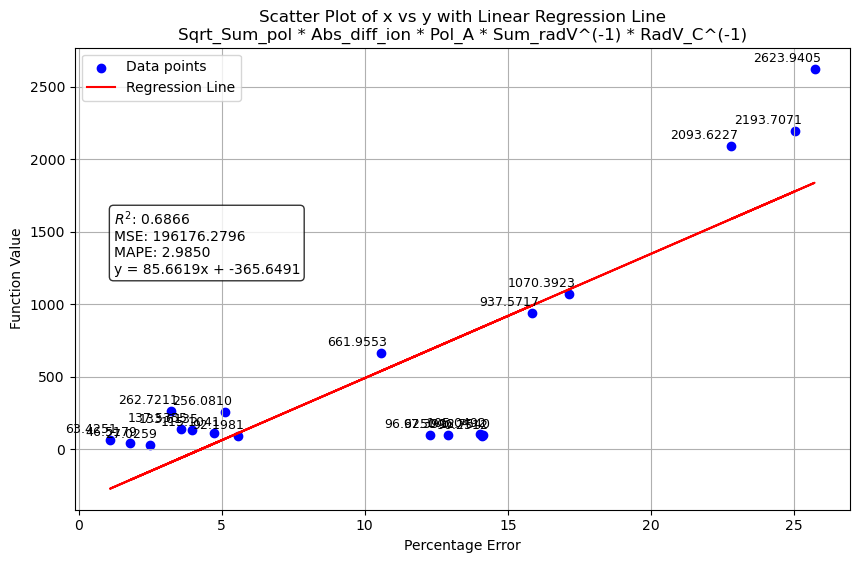

In [837]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Reshape x to a 2D array
x_reshaped = x.values.reshape(-1, 1)  # Convert x to a 2D array (n, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x_reshaped, y)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]  # model.coef_ gives the slope of the line
intercept = model.intercept_  # model.intercept_ gives the intercept

# Predict y values using the linear model
y_pred = model.predict(x_reshaped)

# Calculate R^2, MSE, and MAPE
r_squared = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)

# Display the equation of the line
equation = f"y = {slope:.4f}x + {intercept:.4f}"

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title(f'Scatter Plot of x vs y with Linear Regression Line\n{param}')
plt.xlabel('Percentage Error')
plt.ylabel('Function Value')
plt.grid()
plt.legend()

for i in range(len(x)):
    plt.annotate(f"{y.iloc[i]:.4f}", (x.iloc[i], y.iloc[i]), textcoords="offset points", xytext=(5,5), ha='right', fontsize=9)

# Add text box with metrics
textstr = f"$R^2$: {r_squared:.4f}\nMSE: {mse:.4f} \nMAPE: {mape:.4f}\n{equation}"
plt.gca().text(0.05, 0.65, textstr, transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

plt.show()

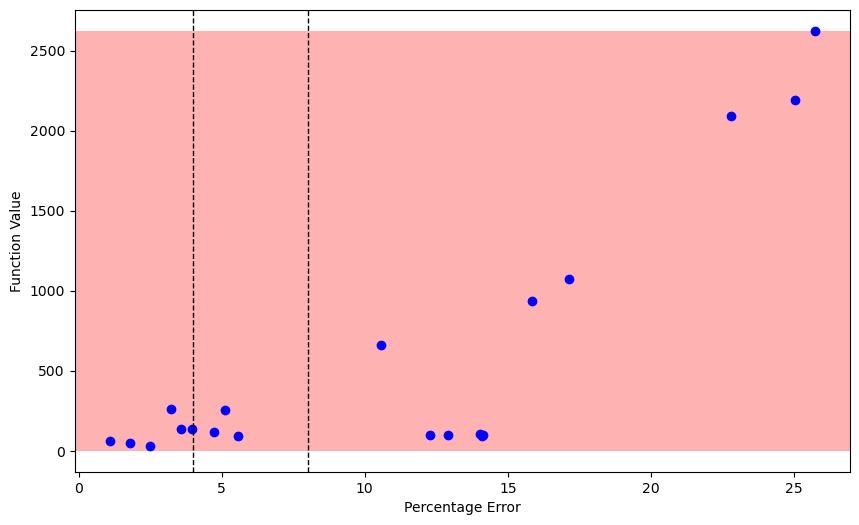

In [838]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Reshape x to a 2D array
x_reshaped = x.values.reshape(-1, 1)  # Convert x to a 2D array (n, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x_reshaped, y)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]  # model.coef_ gives the slope of the line
intercept = model.intercept_  # model.intercept_ gives the intercept


# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Adding colored regions
ax.axhspan(0, 0.075, facecolor='green', alpha=0.3)
ax.axhspan(0.075, 0.16, facecolor='yellow', alpha=0.3)
ax.axhspan(0.16, max(y), facecolor='red', alpha=0.3)

# Add vertical lines at x = 4 and x = 10
ax.axvline(x=4, color='black', linestyle='--', linewidth=1)
ax.axvline(x=8, color='black', linestyle='--', linewidth=1)

plt.scatter(x, y, color='blue', label='Data points')
# plt.plot(x, y_pred, color='red', label='Regression Line')
# plt.title(f'Scatter Plot of x vs y with Linear Regression Line\n{param}')
plt.xlabel('Percentage Error')
plt.ylabel('Function Value')
# plt.grid()

# for i in range(len(x)):
#     plt.annotate(f"{x.iloc[i]:.2f}", (x.iloc[i], y.iloc[i]), textcoords="offset points", xytext=(5,5), ha='right', fontsize=9)

# Add text box with metrics

plt.show()


### Results

1. Ion_C * EN_A * Sum_ion * Abs_diff_ion * Ion_A^(-1) * EN_C^(-1) * Sum_EN^(-1) * Abs_diff_EN^(-1) 

### Task

1. Check liturature for binary battery materials , check umbd paper

2. Test for more ionic compounds

Problem with D3(S) they only applied for molecular systems. Periodic systems are missing. We can include these periodic systems.

In [839]:
import pandas as pd

# Convert your data to a DataFrame
df = pd.DataFrame(filtered_expressions)

# Assuming the column `1` contains lists of numbers
# Expand the column with lists into separate columns
expanded_columns = pd.DataFrame(df[1].tolist())

# Concatenate the expanded columns back with the rest of the DataFrame
df = pd.concat([df.drop(columns=[1]), expanded_columns], axis=1)

df = df.T

df.columns = df.iloc[0]  # Set the first row as column names
df = df[1:]  # Drop the first row since it's now the header

df.shape


res = pd.Series(res)
res.shape

(20,)

In [840]:
X=df
y=res

In [841]:
X, y

(0  Abs_diff_ion * Pol_A Sqrt_Sum_pol * Abs_diff_ion * Pol_A  \
 0              36.97298                          480.093825   
 1              38.11401                          492.851142   
 2              41.71299                          715.484181   
 3              42.45263                          764.512817   
 4              43.93191                          884.232691   
 5              133.0206                         2710.488536   
 6              110.4928                           1477.0536   
 7               89.6525                          798.863642   
 8              44.99594                          582.936252   
 9               18.7404                          142.808734   
 10              30.4061                          236.112715   
 11             37.00195                          481.594274   
 12             544.3952                         6496.348009   
 13             836.1153                        15082.555946   
 14             982.9704                

In [842]:
X.shape, y.shape

((20, 99), (20,))

In [843]:
import numpy as np

y_log = np.log1p(y)  # Apply log transformation to stabilize variance

y_log

0     2.716898
1     2.713460
2     2.710332
3     2.633770
4     2.585666
5     1.442377
6     1.811775
7     1.520371
8     1.743250
9     1.252756
10    1.031508
11    1.881028
12    2.898360
13    3.259141
14    3.170297
15    3.285390
16    2.447023
17    2.824794
18    0.740172
19    1.602701
dtype: float64

In [844]:
q1 = y.quantile(0.25)
q3 = y.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

y_filtered = y[(y >= lower_bound) & (y <= upper_bound)]

y_filtered


0     14.133308
1     14.081370
2     14.034265
3     12.926169
4     12.272122
5      3.230739
6      5.121300
7      3.573920
8      4.715887
9      2.499976
10     1.805294
11     5.560246
12    17.144356
13    25.027178
14    22.814559
15    25.719393
16    10.553895
17    15.857470
18     1.096295
19     3.966428
dtype: float64

In [845]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale features


In [846]:
X_scaled

array([[-0.66540964, -0.6022943 , -0.65951815, ..., -0.60625373,
        -0.6057743 , -0.50386631],
       [-0.66178745, -0.5999852 , -0.65592542, ..., -0.58703469,
        -0.61535219, -0.53309412],
       [-0.65036251, -0.55968809, -0.56529301, ..., -0.36649447,
        -0.59178571, -0.46117889],
       ...,
       [ 0.82196484,  0.37785858,  0.44915905, ...,  0.23033832,
         0.40128583,  0.39074525],
       [-0.59703922, -0.5990796 , -0.56505344, ..., -0.81359088,
        -0.64157173, -0.79646578],
       [-0.53693208, -0.49935747, -0.45654353, ..., -0.52847117,
        -0.47439392, -0.57479541]])

In [847]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=21)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)


# Predict
y_pred = model.predict(X_test)

print( y_test, y_pred)


# Compute MAPE
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # MAPE in percentage

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Get feature importance (coefficients for linear regression)
features = X.columns  # Feature names
coefficients = model.coef_

# Combine into a dictionary
importance_dict = {feature: coef for feature, coef in zip(features, coefficients)}

# Sort by importance
sorted_importances = sorted(importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)


7      3.573920
10     1.805294
19     3.966428
13    25.027178
dtype: float64 [-10.23862228  20.82404349 -11.51573828 -32.89540941]
Mean Absolute Percentage Error (MAPE): 515.44%


In [848]:
# Get intercept (β0)
intercept = model.intercept_

# Get coefficients (β1, β2, ..., βn)
coefficients = model.coef_

# Combine features and coefficients into a dictionary
coef_dict = {feature: coef for feature, coef in zip(X.columns, coefficients)}

# Sort coefficients in descending order based on absolute value
sorted_coefs = sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Construct the equation
equation = f"y = {intercept:.4f}"
for feature, coef in sorted_coefs:
    equation += f" + ({coef:.4f} * {feature}) \n"

print("Sorted Regression Equation:")
print(equation)


Sorted Regression Equation:
y = 7.3968 + (677.4878 * Abs_diff_ion * RadV_A * Pol_C * Pol_A * Sum_radV^(-1) * Sqrt_Sum_pol^(-1) * RadV_C^(-1)) 
 + (-539.0507 * Abs_diff_ion * Pol_C * Pol_A * Sum_radV^(-1) * Sqrt_Sum_pol^(-1) * RadV_C^(-1)) 
 + (-411.8143 * Abs_diff_ion * Pol_A * Sum_radV^(-1) * RadV_C^(-1)) 
 + (385.6148 * Sqrt_Sum_pol * Abs_diff_ion * Pol_A * Sum_radV^(-1) * RadV_C^(-1) * RadV_A^(-1)) 
 + (-376.6893 * Abs_diff_ion * Pol_A * Sum_radV^(-1)) 
 + (324.0533 * Sum_radV * Abs_diff_ion * Pol_A * RadV_C^(-1)) 
 + (-307.7486 * Abs_diff_ion * Pol_C * Pol_A * Sqrt_Sum_pol^(-1) * RadV_C^(-1) * RadV_A^(-1)) 
 + (256.5694 * Abs_diff_ion * RadV_C * Pol_A * Sum_radV^(-1) * RadV_A^(-1)) 
 + (-255.7162 * Sqrt_Sum_pol * Abs_diff_ion * Pol_A * Sum_radV^(-1)) 
 + (248.0098 * Abs_diff_ion * RadV_A * Pol_A * Sum_radV^(-1) * RadV_C^(-1)) 
 + (245.5053 * Abs_diff_ion * Pol_C * Pol_A * Sum_radV^(-1) * RadV_C^(-1) * RadV_A^(-1)) 
 + (-234.9159 * Abs_diff_ion * Pol_C * Pol_A * Sum_radV^(-1) * Sqrt

In [849]:
from sklearn.preprocessing import StandardScaler
data = [[10, -1], [10, -1], [20, 1], [20, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
print(scaler.mean_)
print(scaler.transform(data))
print(scaler.transform([[-1, -1],[3,3]]))

StandardScaler()
[15.  0.]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[-3.2 -1. ]
 [-2.4  3. ]]
